# Python Control Module

In [145]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

## State Space Models

The function ss creates a state space model of the system. A continuous linear time-invariant (LTI) system will be used for this example. When you print the system, you will recieve an output that states the type of system, number of inputs/outputs, number of states, and the values of the variables (A, B, C, D) in the system. 

In [146]:
sys = ct.ss(-4, 3, 1, 0)
print(sys)

<LinearIOSystem>: sys[172]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (1): ['x[0]']

A = [[-4.]]

B = [[3.]]

C = [[1.]]

D = [[0.]]



You can also simply type the name of the system to display it in matrix form.

In [149]:
sys

<LinearIOSystem:sys[172]:['u[0]']->['y[0]']>

## Transfer Functions

Creating a transfer function can be accomplished by first defining the constant s using the following command

In [150]:
s = ct.TransferFunction.s
s

TransferFunction(array([1, 0]), array([1]))

This can then be utilized to define a transfer function G(s)

In [151]:
G  = (s + 1)/(s**2 + 2*s + 1)
G

TransferFunction(array([1, 1]), array([1., 2., 1.]))

For single input single output (SISO) systems, the transfer function of a simple system can be defined using the TransferFunction command and specifying the coefficients of the numerator and denominator. 

In [152]:
sys = ct.TransferFunction([2,2], [1, 2, 3])
sys

TransferFunction(array([2, 2]), array([1, 2, 3]))

## Controlability and Observability Matrices

This module has built in functions to easily determine the controllability and observability matrices of a system using the functions ct.ctrb and ct.obs. 

In [153]:
controllability = ct.ctrb(A, B)
controllability

array([[1., 1., 3., 3.],
       [1., 1., 3., 3.]])

In [154]:
observability = ct.obsv(A, C)
observability

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [2., 1.]])

## Controllability and Observability Gramians

The controllability or observability Gramian can be found using the ct.gram function specifiying the system and type (controllability or observability) of Gramian desired. It is important to note here that using a transfer function model will result in a ValueError as seen below.

In [155]:
ct.gram(G, 'c')

ValueError: System must be StateSpace!

The gramian function will only take a state space respresentation of the model. Furthermore, the system must be stable in order for the Gramian to be computed as seen in the value error below.

In [156]:
unstableSystem = ct.ss(4, -3, 1, 0)
ct.gram(unstableSystem,'c')

ValueError: Oops, the system is unstable!

Using the stable LTI system defined earlier, you can successfully compute both the controllability and observability Gramians.

In [157]:
controllabilityGramian = ct.gram(sys, 'c')
print(f'The controllability Gramian is: {controllabilityGramian}')

ValueError: System must be StateSpace!

In [158]:
controllabilityGramian = ct.gram(sys, 'o')
print(f'The controllability Gramian is: {controllabilityGramian}')

ValueError: System must be StateSpace!

## Poles,  Zeros, and Gain

The ct.poles and ct.zeros functions are used to determine the poles and zeros of the system. They can be used on both state space representations and transfer functions and return an array of the poles/zeros of the system.

In [159]:
stateSpacePoles = ct.poles(system)
print(f'The poles of the state space system are {stateSpacePoles}')

transferFunctionPoles = ct.poles(G)
print(f'\nThe poles of the transfer function G are {transferFunctionPoles}')

The poles of the state space system are [ 1.61168440e+01+0.j -1.11684397e+00+0.j -9.75918483e-16+0.j]

The poles of the transfer function G are [-1.+0.j -1.+0.j]


In [160]:
stateSpaceZeros = ct.zeros(system)
print(f'The zeros of the state space system are {stateSpaceZeros}')

transferFunctionZeros = ct.zeros(G)
print(f'\nThe zeros of the transfer function G are {transferFunctionZeros}')

The zeros of the state space system are [-3.22336879e+01+0.j  2.23368794e+00+0.j  6.35249759e-17+0.j]

The zeros of the transfer function G are [-1.+0.j]


The DC gain of the system can also be found using the ct.dcgaini command. Here we will multiply our transfer function G by a gain of 5 to highlight this.

In [161]:
k = 5 # DC gain 
G = k * (s + 1)/(s**2 + 2*s + 1)
gain = ct.dcgain(G)
print(f'The DC gain of the system is {gain}')

The DC gain of the system is 5.0


## Block Diagrams

### Series Interconnection 

The series command returns the series connection of two systems sys3=sys1 * sys2.

In [162]:
H = (s + 2)/(s + 1)
series = ct.series(G, H)
series

TransferFunction(array([ 5., 15., 10.]), array([1., 3., 3., 1.]))

### Paralllel Interconnection

The parallel command returns the parallel connection of two systems equivalent to sys3=sys1+sys2.

In [163]:
parallel = ct.parallel(G, H)
parallel

TransferFunction(array([ 1.,  9., 15.,  7.]), array([1., 3., 3., 1.]))

### Feedback Interconnection

The feedback command gives the feedback interconnection between two I/O systems. The primary plant is sys1. The feedback plant is sys2 (often a feedback controller).

In [164]:
feedback = ct.feedback(G, H, sign=-1) #the default is sign=-1 which is negative feedback
feedback

TransferFunction(array([ 5., 10.,  5.]), array([ 1.,  8., 18., 11.]))

## Frequency Domain Plotting

### Bode Plot

The bode plot of the system can be plotted over a (optional) frequency range using the ct.bode command. It returns the magnitude ratio, phase lag, and frequency as well as the bode plot for a given transfer function.

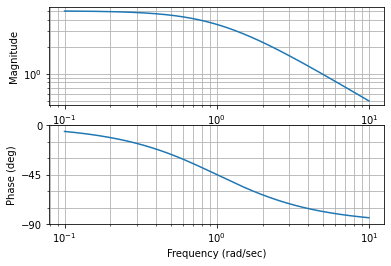

In [165]:
mag, phase, omega = ct.bode(G)

The bode plot can be customized with several options including setting the x axis to units of Hz or changing the phase from degrees to radians.

In [166]:
mag, phase, omega = ct.bode(G, w, Hz=True, deg=False)

NameError: name 'w' is not defined

The freqresp command outputs the same information but does not plot it.

In [ ]:
w=linspace(0.1, 10, 30)
mag, phase, omega = ct.freqresp(G, w)

In [ ]:
mag

### Gain and Phase Margin and Crossover Frequencies

You can calculate the gain and phase margin and the associated crossover frequencies using the margin command.

In [167]:
gm, pm, Wcg, Wcp = ct.margin(G)
print(f"The gain margin is {gm} degrees with phase crossover frequency {Wcp} rad/s.")
print(f"The phase margin is {pm} with gain crossover frequency {Wcg}.")

The gain margin is inf degrees with phase crossover frequency 4.898979485566359 rad/s.
The phase margin is 101.5369590328155 with gain crossover frequency nan.


### Nyquist Plot

The Nyquist plot for the system can also be plotted over an (optional) frequency range.

0

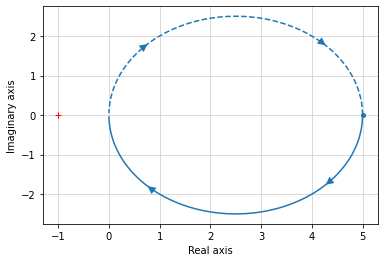

In [168]:
ct.nyquist_plot(G)

## Time Domain Simulation

### Forced Response

The ct.forced_response command simulates the output of a linear system. 

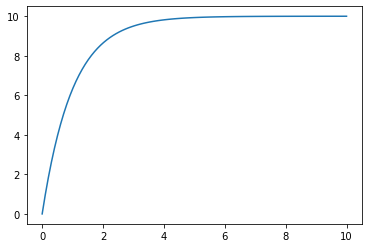

In [169]:
T=np.linspace(0, 10, 100)
u=2
X0=0 #if left blank, defaults to 0
forced_T, forced_yout = ct.forced_response(G, T, u, X0)
plt.plot(forced_T, forced_yout)

### Impulse Response

The ct.initial_response command gives the response of a linear system given initial conditions. If the system has multiple outputs, one may be selected, or if no selection is made, all outputs are given. Similar to forced response but with zero input.

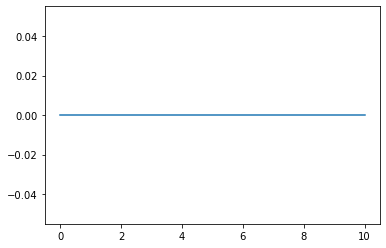

In [170]:
impulse_T, impulse_yout = ct.initial_response(G, T, X0) #yout is the response output
plt.plot(impulse_T, impulse_yout)

### Step Response

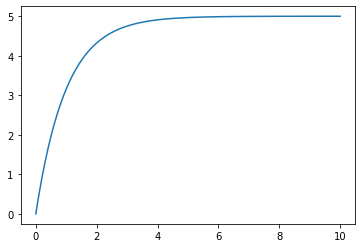

In [171]:
step_T, step_yout = ct.step_response(G, T, X0)
plt.plot(step_T, step_yout)

# Optimal Control

In [172]:
import control.optimal as obc
from control import flatsys

Consider the following optimal control problem:

Find the control that optimizes the following objective (cost): $\min_{u(t)} \int_{t_0}^{t_f} L(x,u)dt $

subject to the dynamic constraints: $\dot{x}=f(x,u)$

and any additional constraints: $lb_i \leq g_i(x,u) \leq ub_i$ 

This optimal control problem can be solved using the `obc.solve_ocp(sys,horizon,X0,cost,constraints)` function

## Brachistochrone Problem

$\min t_f$

subject to $\dot{x}=v\sin u, \quad (x(0),x(t_f))=(0,2) \\ \dot{y}=v\cos u, \quad (y(0),y(t_f))=(0,2) \\ \dot{v}=g\cos u, \quad (v(0),v(t_f))=(0,Free)$

`sys` parameter is an `InputOutputSystem` object

In [173]:
def model_update(t, z, u, params):
    g = params.get('g',10.)
    
    # Define state variables
    x = z[0]
    y = z[1]
    v = z[2]
    t = z[3] # include t as a state since the transformed problem is on [0,1]
    
    # Define control variables
    th = u[0]
    tf = u[1] # tf is included as a control variable since the final time is unknown
    
    xdot = (v * np.sin(u[0])) * tf
    ydot = (v * np.cos(u[0])) * tf
    vdot = (g * np.cos(u[0])) * tf
    tdot = tf
    
    return np.array([xdot, ydot, vdot, tdot])

def model_output(t, z, u, params):
    return z
    
model = ct.NonlinearIOSystem(model_update, model_output,
                             states=4, name='brachistochrone',
                             inputs=('th','tf'), outputs=('x','y','v','t'))
model

<NonlinearIOSystem:brachistochrone:['th', 'tf']->['x', 'y', 'v', 't']>

`obc.quadratic_cost` used to create a quadratic cost function: $\int (\mathbf{x}^T \mathbf{Qx} + \mathbf{u}^T \mathbf{Ru})dt$ 

In [174]:
Q = np.diag(np.zeros(4))
R = np.diag(np.zeros(2))

traj_cost = obc.quadratic_cost(model, Q, R)
traj_cost

<function control.optimal.quadratic_cost.<locals>.<lambda>(x, u)>

Cost functions can also be defined with a user-defined function, called as `cost_function(x,u)`

In [175]:
term_cost = lambda z, u: z[3] # tf

Next we define our problem bounds. It is best practice to provide bounds for all variables.

In [176]:
# Define problem bounds
x0 = 0.; xf = 2.
y0 = 0.; yf = 2.
v0 = 0.; vf = None
t0 = 0.; tf = None

xlb = -10.; xub = 10.
ylb = -10.; yub = 10.
vlb = -10.; vub = 10.
tlb = 0.;   tub = 10.

thlb = 0.; thub = 10.
tflb = 0.; tfub = 10.

z0 = [x0, y0, v0, t0]

Next we define our constraints. The `optimal` module provides several functions for this, such as `input_range_constraint()` and `state_range_constraint`, but constraints can also be made with user-defined functions. The syntax is `(scipy.optimize.LinearConstraint,A,lb,ub)` or `(scipy.optimize.NonlinearConstraint,fun,lb,ub)`. The constraints are then passed as a list of tuples.

In [177]:
input_bounds = obc.input_range_constraint(model, [thlb,tflb], [thub,tfub])
state_bounds = obc.state_range_constraint(model, [xlb,ylb,vlb,tlb], [xub,yub,vub,tub])

traj_constraints = [ input_bounds, state_bounds ]
traj_constraints

[(scipy.optimize._constraints.LinearConstraint,
  array([[0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 1.]]),
  array([0., 0.]),
  array([10., 10.])),
 (scipy.optimize._constraints.LinearConstraint,
  array([[1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.]]),
  array([-10., -10., -10.,   0.]),
  array([10., 10., 10., 10.]))]

In [178]:
from scipy.optimize import NonlinearConstraint

term_state = obc.state_range_constraint(model, [xf,yf,vlb,tlb], [xf,yf,vub,tub]) # xf and yf are fixed, vf is free, and tf is unknown

term_time = (NonlinearConstraint, lambda z,u: z[3] - u[1], 0.,0.) # Constraining the tf state variable with the tf control variable

term_constraints = [ term_state, term_time ]
term_constraints

[(scipy.optimize._constraints.LinearConstraint,
  array([[1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.]]),
  array([  2.,   2., -10.,   0.]),
  array([ 2.,  2., 10., 10.])),
 (scipy.optimize._constraints.NonlinearConstraint,
  <function __main__.<lambda>(z, u)>,
  0.0,
  0.0)]

Define the horizon over which to solve the problem. For this problem, we transformed the original time horizon from $[t_0,t_f]$ to $[0,1]$.

In [179]:
horizon = np.linspace(0, 1, 10, endpoint=True)

Finally, we can call `solve_ocp` to solve our optimal control problem.

In [ ]:
result = obc.solve_ocp(model, horizon, z0, 
                       cost=traj_cost, terminal_cost=term_cost, 
                       trajectory_constraints=traj_constraints,
                       terminal_constraints=term_constraints,
                       initial_guess=[1.,1.])

C:\Users\devdo\anaconda3\lib\site-packages\scipy\optimize\_constraints.py:419: OptimizeWarning: Equality and inequality constraints are specified in the same element of the constraint list. For efficient use with this method, equality and inequality constraints should be specified in separate elements of the constraint list. 
  warn("Equality and inequality constraints are specified in the same "


As a blackbox function, `optimal` does not require much understanding of optimal control to pose an optimal control problem. However, it also offers very little customization of the numerical methods used to solve the problem. Therefore, it can be difficult to achieve convergence, as noted in the documentation. Some tips for trying to achieve convergence:
- Try using a smaller number of time points in your horizon (prevents the problem from growing too large)
- Use smooth basis functions (instead of the default which parameterizes the control at each time point)
- Tweak the optimizer options (see `scipy.optimize.minimize()` for accepted kwargs)

In [ ]:
result = obc.solve_ocp(model, horizon, z0, 
                       cost=traj_cost, terminal_cost=term_cost, 
                       trajectory_constraints=traj_constraints,
                       terminal_constraints=term_constraints,
                       initial_guess=[1.,1.],
                       basis=flatsys.PolyFamily(2),
                       minimize_method='SLSQP',
                       minimize_options={'eps': 0.1})

In [ ]:
resp = ct.input_output_response(model, horizon, result.inputs, z0,
                                t_eval=np.linspace(0, 1, 1000)) # Resample our result using a denser grid
t, z, u = resp.time, resp.outputs, resp.inputs

t = z[3] 

fig, axs = plt.subplots(1, 2, figsize=(8,4), layout='constrained')
axs[0].plot(t, z[0],label=r'$x$')
axs[0].plot(t, z[1],label=r'$y$')
axs[0].plot(t, z[2],label=r'$v$')
axs[0].set_xlabel("t")
axs[0].set_ylabel("state")
axs[0].legend()

axs[1].plot(t, u[0],label=r'$u$')
axs[1].set_xlabel("t")
axs[1].set_ylabel("u")

for ax in axs:
    ax.set_xlim(0)
    ax.set_ylim(0)
    ax.grid(True)